In [342]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

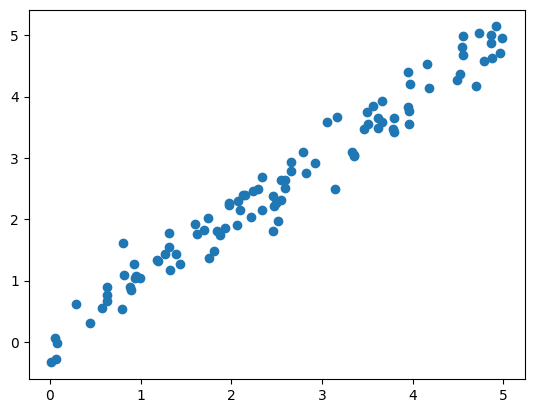

In [343]:
plt.scatter(X[:,0], X[:,1])

In [406]:
# Start cov
def f(x, theta):
    x_reshaped = np.reshape(x, (x.shape[0], 1))
    zeros = np.zeros((x.shape[0], 1))
    x_aug = np.concatenate((x_reshaped, zeros), axis=1)
    return x_aug @ theta

In [416]:
def get_theta(X, y, covariance_prior):
    var_y = np.var(y) * np.eye(100)
    mean_theta = covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ y
    cov_theta = covariance_prior - covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ X @ covariance_prior
    return mean_theta, cov_theta
#plt.scatter(X[:,0], X[:,1])
# Evaluate the Gaussian density at each point on the grid
#z = np.exp(-0.5 * np.sum((xy - mean) @ np.linalg.inv(covariance) * (xy - mean), axis=1))
#print(stats.multivariate_normal.pdf(xy[0], mean=xy[0].T @ mean_new, cov=np.var(y) + xy[0].T @ cov_new @ xy[0]))
#z = np.array([stats.multivariate_normal.pdf(x, mean=x.T @ mean_new, cov=np.var(y) + x.T @ cov_new @ x) for x in xy])
#z = z.reshape(xgrid.shape)

def plot(mean, cov, x, y):
    # Define the grid for the contour plot
    plt.scatter(x, y, alpha=0.7)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    x_grid, y_grid = np.mgrid[xmin:xmax:.1, ymin:ymax:.1]

    pos = np.empty(x_grid.shape + (2,))
    pos[:, :, 0] = x_grid
    pos[:, :, 1] = y_grid
    #print(np.dstack((x_grid, y_grid)))
    z = []

    # Create a multivariate normal distribution
    for row in np.dstack((x_grid, y_grid)):
        row_z = []
        for p in row:
            #p = np.array([x_var, y_var])
            #print(p)
            rv = stats.multivariate_normal(p.T @ mean, np.var(y) + p.T @ cov @ p)
            # Evaluate the probability density function on the grid
            row_z.append(rv.pdf(p.T @ mean_new))
        z.append(np.array(row_z))
    z = np.array(z).reshape(x_grid.shape)
    # Plot the scatter plot
    plt.contour(x_grid, y_grid, z)
    plt.plot(np.linspace(xmin, xmax), f(np.linspace(xmin, xmax), mean))
    plt.show()


# Spread of points along a line

Gaussian distribution, tight variance

In [426]:
d = 2
np.random.seed(1337)
x = np.random.rand(100) * 5
y = np.random.normal(loc = 0, scale=np.sqrt(1.2), size=100) + x # Linear function with slope 1 added noise epsilon
X = np.dstack((x,y))[0]
#print(x.reshape([x.shape[0], 1]))
cov_prior = np.array([[7, 1.5], [1.5, 2]])
mean = 0

mean_new, cov_new = get_theta(x.reshape([x.shape[0], 1]), y, cov_prior)
print(mean_new)
plot(mean_new, cov_new, x, y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

1.948414990084859
[[-0.23411688  0.        ]
 [-0.12249066  0.        ]
 [-0.01086444  0.        ]
 [ 0.10076177  0.        ]
 [ 0.21238799  0.        ]
 [ 0.32401421  0.        ]
 [ 0.43564042  0.        ]
 [ 0.54726664  0.        ]
 [ 0.65889286  0.        ]
 [ 0.77051907  0.        ]
 [ 0.88214529  0.        ]
 [ 0.99377151  0.        ]
 [ 1.10539772  0.        ]
 [ 1.21702394  0.        ]
 [ 1.32865016  0.        ]
 [ 1.44027637  0.        ]
 [ 1.55190259  0.        ]
 [ 1.66352881  0.        ]
 [ 1.77515502  0.        ]
 [ 1.88678124  0.        ]
 [ 1.99840746  0.        ]
 [ 2.11003367  0.        ]
 [ 2.22165989  0.        ]
 [ 2.33328611  0.        ]
 [ 2.44491233  0.        ]
 [ 2.55653854  0.        ]
 [ 2.66816476  0.        ]
 [ 2.77979098  0.        ]
 [ 2.89141719  0.        ]
 [ 3.00304341  0.        ]
 [ 3.11466963  0.        ]
 [ 3.22629584  0.        ]
 [ 3.33792206  0.        ]
 [ 3.44954828  0.        ]
 [ 3.56117449  0.        ]
 [ 3.67280071  0.        ]
 [ 3.78442

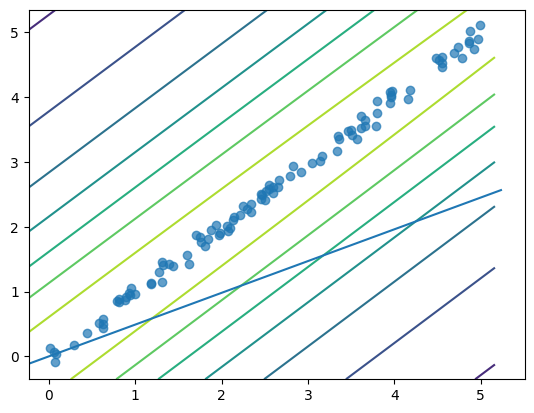

In [400]:
y = np.random.normal(loc = 0, scale=0.1, size=100) + x # Linear function with slope 1 added noise epsilon
X = np.dstack((x,y))[0]
print(np.var(y))
cov_prior = np.array([[7, 1.5], [2, 2]])

mean_new, cov_new = get_theta(X, y, cov_prior)
plot(mean_new, cov_new, x, y)
